<a href="https://colab.research.google.com/github/HoangLong1907/Nhandang-CS338/blob/main/Baitap/KMean_without_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [ ]:
means = [[2, 8], [9, 3], [3, 4]]      # phân thành 3 cluster
cov = [[1, 0], [0, 1]]
N = 500                               # mỗi cluster có 500 điểm
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

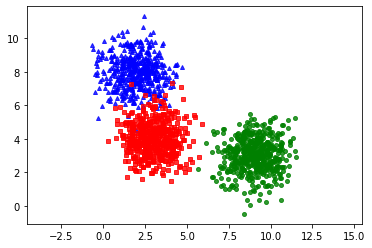

In [ ]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

In [ ]:
def kmeans_init_centers(X, k):
    # Chọn ngẫu nhiên k hàng của X làm center
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # Tính khoảng cách theo cặp dữ liệu và trung tâm
    D = cdist(X, centers)
    # Trả về index của center gần nhất
    return np.argmin(D, axis = 1)

def kmeans_assign_labels_cosine(X, centers):
    # Tính khoảng cách theo cặp dữ liệu và trung tâm dùng cosine
    D = cdist(X, centers,'cosine')
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # thu thập các điểm được giao cho cụm thứ k
        Xk = X[labels == k, :]
        # Tính trung bình
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True nếu 2 tập trung tâm giống nhau
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

In [ ]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers được tìm thấy:
[[2.99225557 3.99486868]
 [1.97965449 8.02428624]
 [9.0410628  3.02094748]]


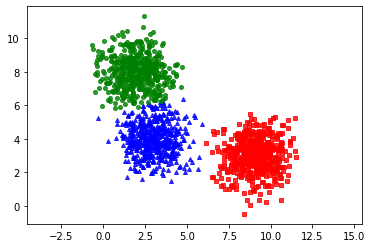

In [ ]:
(centers, labels, it) = kmeans(X, K)
print('Centers được tìm thấy:')
print(centers[-1])

kmeans_display(X, labels[-1])

In [ ]:
def kmeans_cosine(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels_cosine(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers được tìm thấy dùng cosine:
[[8.69658413 2.98238587]
 [1.82221479 7.58389323]
 [3.20095014 4.27681045]]


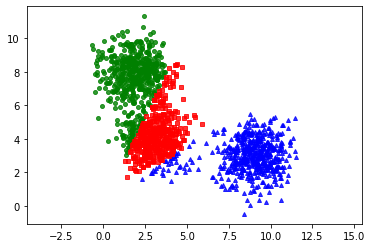

In [ ]:
(centers, labels, it) = kmeans_cosine(X, K)
print('Centers được tìm thấy dùng cosine:')
print(centers[-1])

kmeans_display(X, labels[-1])